# Practical-4
Implement Titanic Survivor Classification using ML
Pipeline. Execute all the stages of ML pipeline. Also
create a pickle file for the model using joblib.

## Step-1: Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import joblib

## Step-2: Data Collection and Exploration

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Checking fata types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# Statistics Summary
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Identifying Missing Values
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


## Step-3: Data Cleaning

In [7]:
# Dropping unnecessary columns
df.drop(['deck','class','who','deck', 'embark_town', 'alive','alone'], axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male
0,0,3,male,22.0,1,0,7.2500,S,True
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [8]:
# Handling Missing Values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male
0,0,3,male,22.0,1,0,7.2500,S,True
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [9]:
# Feature Engineering

# Converting sex to Numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
# Converting embarked to Numeric
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [10]:
# Creating familySize
df['familySize'] = df['sibsp'] + df['parch'] + 1

In [11]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,familySize
0,0,3,0,22.0,1,0,7.2500,0,True,2
1,1,1,1,38.0,1,0,71.2833,1,False,2
2,1,3,1,26.0,0,0,7.9250,0,False,1
3,1,1,1,35.0,1,0,53.1000,0,False,2
4,0,3,0,35.0,0,0,8.0500,0,True,1


In [12]:
df['adult_male'] = df['adult_male'].map({True:1, False:0})

In [13]:
# Creating isAlone
df['isAlone'] = 0
df.loc[df['familySize'] == 1, 'isAlone'] = 1

Step-4 EDA

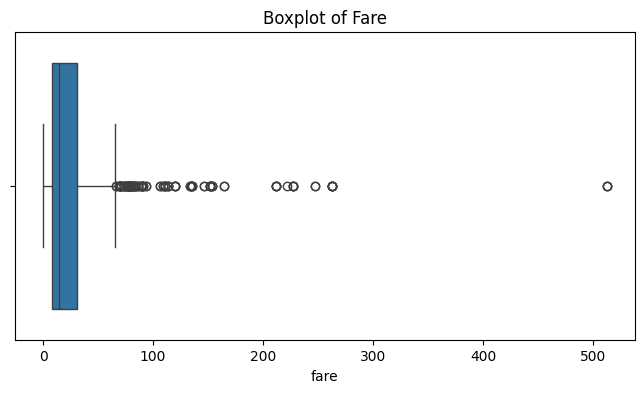

In [14]:
# Detecting and Handle=ing Outliers
# Outliers can skew means, distort feature scaling, and negatively impact many machine learning models(especially linear models).

# For the Titanic dataset, Fare and Age often have outliers that need to be examined.
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Fare
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fare'])
plt.title('Boxplot of Fare')
plt.show()

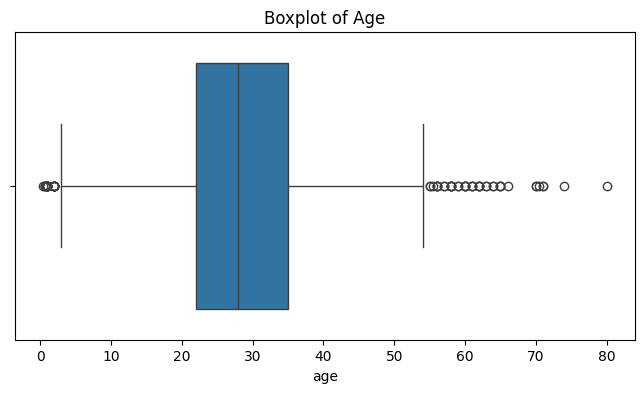

In [15]:
# Boxplot for Age
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.show()

In [16]:
# Detecting Outliers by using IQR
def detect_outliers_iqr(data, column):
 Q1 = data[column].quantile(0.25)
 Q3 = data[column].quantile(0.75)
 IQR = Q3 - Q1
 lower_bound = Q1 - 1.5 * IQR
 upper_bound = Q3 + 1.5 * IQR
 return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers_fare = detect_outliers_iqr(df, 'fare')
outliers_age = detect_outliers_iqr(df, 'age')
print(f"Outliers in Fare: {outliers_fare.shape[0]}")
print(f"Outliers in Age: {outliers_age.shape[0]}")

Outliers in Fare: 116
Outliers in Age: 66


In [17]:
# Handling outliers
def cap_outliers(data, column):
 lower = data[column].quantile(0.05)
 upper = data[column].quantile(0.95)
 data[column] = data[column].clip(lower, upper)
 return data

df = cap_outliers(df, 'fare')
df = cap_outliers(df, 'age')

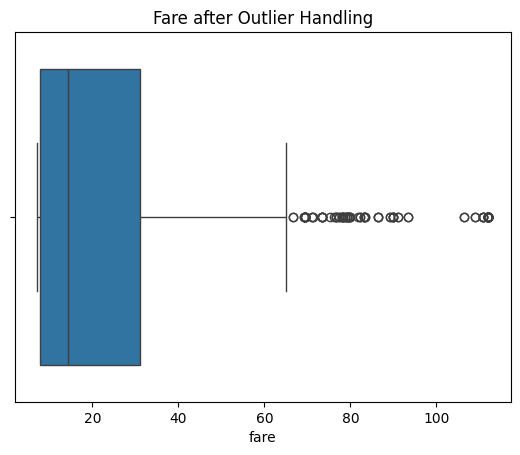

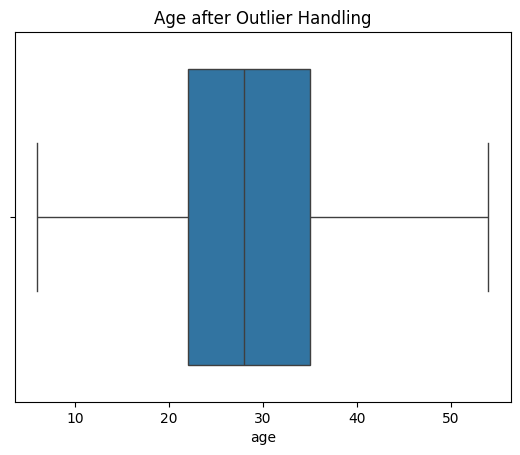

In [18]:
sns.boxplot(x=df['fare'])
plt.title('Fare after Outlier Handling')
plt.show()

sns.boxplot(x=df['age'])
plt.title('Age after Outlier Handling')
plt.show()

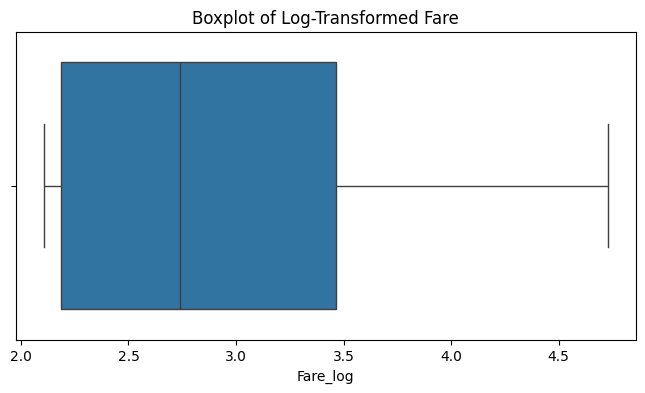

In [19]:
# Log Transform SKewed Features (like fare)
df['Fare_log'] = np.log1p(df['fare'])  # log(1 + x) handles 0 safely --> log(1 + Fare)

# Plot the box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Fare_log'])
plt.title("Boxplot of Log-Transformed Fare")
plt.show()

In [20]:
# Feature Scaling
scaler = StandardScaler()
df[['Age_scaled','Fare_log_scaled']] = scaler.fit_transform(df[['age','Fare_log']])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,familySize,isAlone,Fare_log,Age_scaled,Fare_log_scaled
0,0,3,0,22.0,1,0,7.2500,0,1,2,0,2.110213,-0.610555,-1.040648
1,1,1,1,38.0,1,0,71.2833,1,0,2,0,4.280593,0.754361,1.571502
2,1,3,1,26.0,0,0,7.9250,0,0,1,1,2.188856,-0.269326,-0.945997
3,1,1,1,35.0,1,0,53.1000,0,0,2,0,3.990834,0.498440,1.222764
4,0,3,0,35.0,0,0,8.0500,0,1,1,1,2.202765,0.498440,-0.929258


## Step-5: Defining Features and Target

In [21]:
features = ['pclass', 'sex', 'age', 'Fare_log', 'embarked', 'familySize', 'isAlone']
target = 'survived'
X = df[features]
y = df[target]

## Step-6: Train-Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step-7: ColumnTransformer for Scaling & Encoding

In [23]:
numeric_features = ['age', 'Fare_log', 'familySize']
categorical_features = ['sex', 'embarked','sex','pclass']
binary_features = ['isAlone']

In [24]:
preprocessor = ColumnTransformer(
transformers=[
      ('imputer', SimpleImputer(strategy='median'), numeric_features),
      ('num', StandardScaler(), numeric_features),  # Standardize numeric columns (mean = 0, std = 1)
      ('cat', OneHotEncoder(drop='first'), categorical_features),  # One-hot encode (drop first to avoid dummy trap)
      ('bin', 'passthrough', binary_features)  # Leave binary feature as is
      ])

## Step-8: Full Pipeline with Logistic Regression

In [25]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

## Step-9: Training the Model

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['age', 'Fare_log',
                                                   'familySize']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'Fare_log',
                                                   'familySize']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'embarked', 'sex',
                                                   'pclass']),
                                                 ('bin', 'passthrough',
                                                  ['isAlone'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

## Step-10: Model Evaluation

In [27]:
y_pred = pipeline.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.7988826815642458

 Confusion Matrix:
 [[91 14]
 [22 52]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [28]:
# Preprocessing for numerical data

numerical_features = ['age', 'fare']
numerical_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='median')),
  ('scaler', StandardScaler())
])

In [29]:
# Preprocessing for categorical data
categorical_features = ['pclass', 'sex', 'sibSp', 'parch', 'embarked']
categorical_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [30]:
from sklearn.compose import make_column_selector as selector
# Combining preprocessing steps
preprocessor = ColumnTransformer(
transformers=[
      ('num', numerical_transformer, selector(dtype_exclude="object")),
      ('cat', categorical_transformer, selector(dtype_include="object"))
])

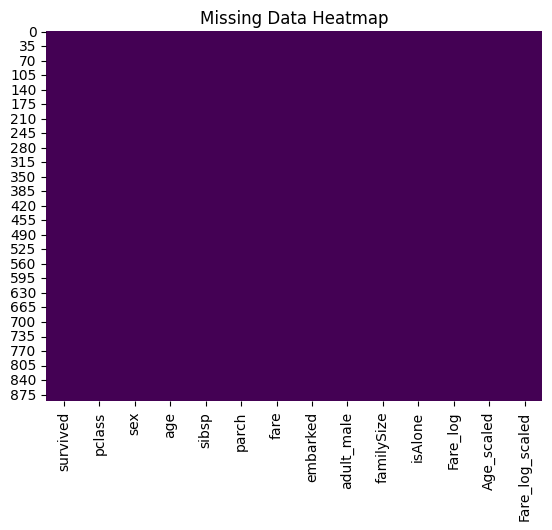

In [31]:
# 4. EDA (Exploratory Data Analysis)
# EDA helps understand the data, detect patterns, and identify any anomalies or relationships
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

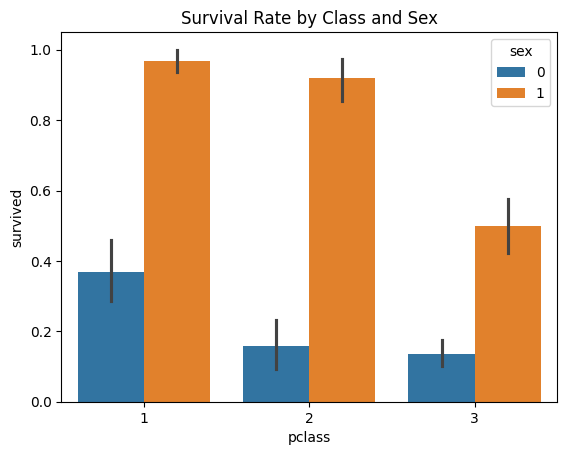

In [32]:
# Visualize survival rate by class and sex
sns.barplot(x='pclass', y='survived', hue='sex', data=df)
plt.title('Survival Rate by Class and Sex')
plt.show()

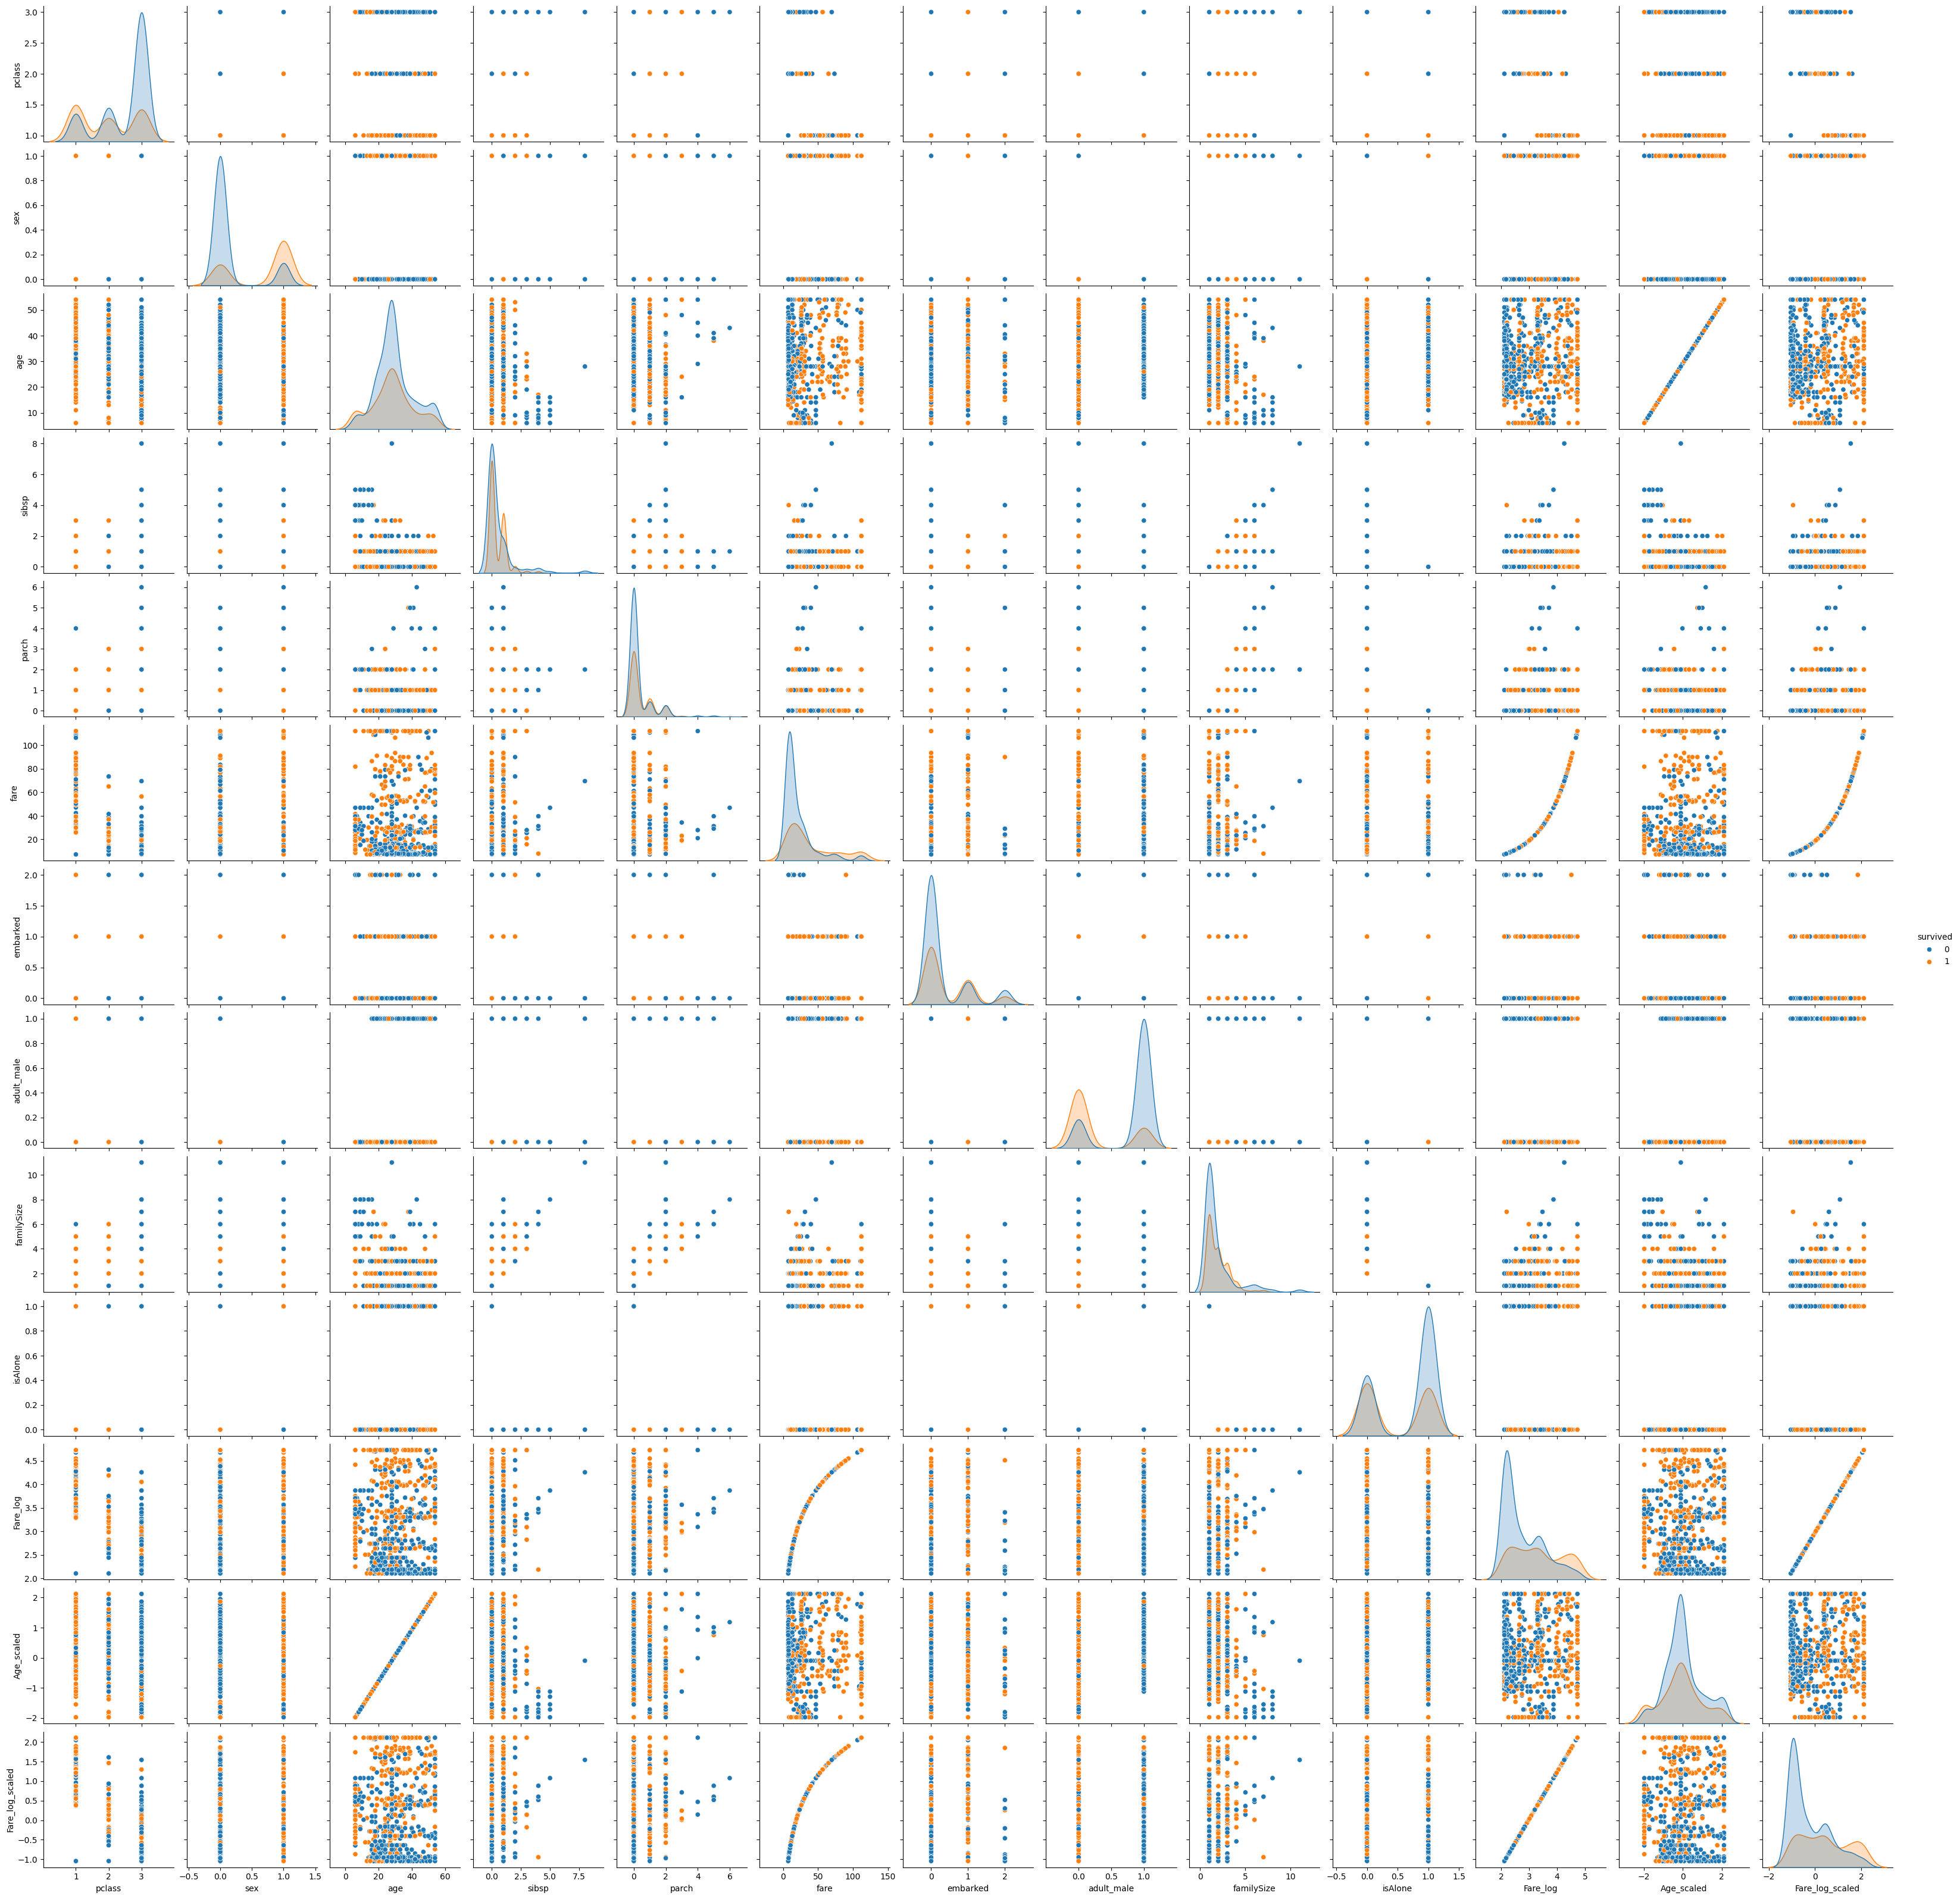

In [33]:
# Pairplot to see feature relationships
sns.pairplot(df, hue='survived', diag_kind='kde')
plt.show()

In [34]:
# Feature engineering: create a new feature 'FamilySize'
df['FamilySize'] = df['sibsp'] + df['parch'] + 1
# Update the data
X = df.drop(columns=['survived'])
y = df['survived']
# Split the data again with the updated feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# 5. Feature Engineering
# Feature engineering involves creating new features or transforming existing ones to improve model performance.
# Feature engineering: create a new feature 'FamilySize'
df['FamilySize'] = df['sibsp'] + df['parch'] + 1
X_train['FamilySize'] = X_train['sibsp'] + X_train['parch'] + 1
X_test['FamilySize'] = X_test['sibsp'] + X_test['parch'] + 1

In [36]:
# Pipeline with preprocessor and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ( 'classifier', RandomForestClassifier(random_state=42))])

# Hyperparameter tuning with GridSearchCV
param_grid = {'classifier__n_estimators': [100, 200],'classifier__max_depth': [None, 10, 20],}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7cb4ac8a4ad0>),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7cb4aef64a70>)])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__n_estimators': [100, 200]})

In [37]:
 # Predictions
 y_pred = grid_search.predict(X_test)
 # Classification report
 print(classification_report(y_test, y_pred))
 # Accuracy score
 accuracy = accuracy_score(y_test, y_pred)
 print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Accuracy: 0.82


## Step-11 Saving the Model

In [38]:
joblib.dump(pipeline, 'titanic_model.pkl')

['titanic_model.pkl']